In [5]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

@tf.function
def printbar():
    today_ts = tf.timestamp()%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8+timestring)

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers

#样本数量
n = 400

# 生成测试用数据集
X = tf.random.uniform([n,2],minval=-10,maxval=10) 
w0 = tf.constant([[2.0],[-3.0]])
b0 = tf.constant([[3.0]])
Y = X@w0 + b0 + tf.random.normal([n,1],mean = 0.0,stddev= 2.0)  # @表示矩阵乘法,增加正态扰动

In [3]:
ds = tf.data.Dataset.from_tensor_slices((X,Y)).shuffle(buffer_size = 100).batch(10).prefetch(tf.data.experimental.AUTOTUNE)

In [4]:
# 定义模型

model = layers.Dense(units =1)
model.build(input_shape = (2,))
model.loss_func = losses.mean_squared_error
model.optimizer = optimizers.SGD(learning_rate=0.001)


In [5]:
@tf.function
def train_step(model,features,labels):
    with tf.GradientTape() as tape:
        predictions = model(features)
        loss = model.loss_func(tf.reshape(labels,[-1]),tf.reshape(predictions,[-1]))
    grads = tape.gradient(loss,model.variables)
    model.optimizer.apply_gradients(zip(grads,model.variables))
    return loss
    

In [7]:
def train_model(model,epochs):
    for epoch in tf.range(1,epochs):
        loss = tf.constant(0.0)
        for features,label in ds:
            loss = train_step(model,features,label)
        if epoch%50==0:
            printbar()
            tf.print("epoch =",epoch,"loss = ",loss)
            tf.print("w =",model.variables[0])
            tf.print("b =",model.variables[1])
train_model(model,epochs = 200)


================================================================================19:12:54
epoch = 50 loss =  2.92929792
w = [[2.02198792]
 [-2.99751163]]
b = [2.95674896]
================================================================================19:12:55
epoch = 100 loss =  3.99188685
w = [[2.00716472]
 [-3.00385785]]
b = [3.00829482]
================================================================================19:12:57
epoch = 150 loss =  1.85865784
w = [[2.01273274]
 [-3.00490642]]
b = [3.0085938]


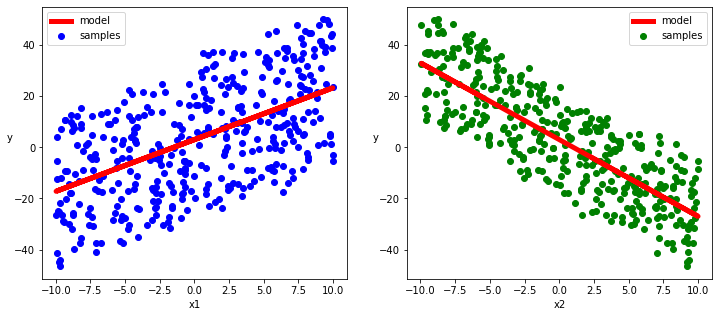

In [8]:
w,b = model.variables

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)



ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()


In [9]:
tf.keras.backend.clear_session()

from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(1,input_shape = (2,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=  'adam',loss = 'mse',metrics=['mae'])
model.fit(X,Y,batch_size=10,epochs=200)
tf.print("w = ",model.layers[0].kernel)
tf.print("b = ",model.layers[0].bias)

Epoch 1/200
40/40 [==============================] - 0s 849us/step - loss: 546.1707 - mae: 19.2144
Epoch 2/200
40/40 [==============================] - 0s 950us/step - loss: 532.1196 - mae: 18.9686
Epoch 3/200
40/40 [==============================] - 0s 999us/step - loss: 518.8957 - mae: 18.7314
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 505.5916 - mae: 18.4937
Epoch 5/200
40/40 [==============================] - 0s 999us/step - loss: 492.7584 - mae: 18.2558
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 479.9851 - mae: 18.0200
Epoch 7/200
40/40 [==============================] - 0s 949us/step - loss: 467.5655 - mae: 17.7865
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 455.3129 - mae: 17.5545
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 443.2893 - mae: 17.3245
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 431.5305 - mae: 17.0921
Epoch 11/200
40/40 

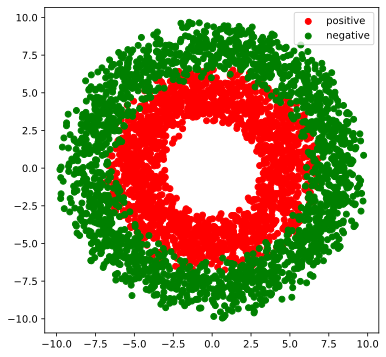

In [6]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#正负样本数量
n_positive,n_negative = 2000,2000
n = n_positive+n_negative

#生成正样本, 小圆环分布
r_p = 5.0 + tf.random.truncated_normal([n_positive,1],0.0,1.0)
theta_p = tf.random.uniform([n_positive,1],0.0,2*np.pi) 
Xp = tf.concat([r_p*tf.cos(theta_p),r_p*tf.sin(theta_p)],axis = 1)
Yp = tf.ones_like(r_p)

#生成负样本, 大圆环分布
r_n = 8.0 + tf.random.truncated_normal([n_negative,1],0.0,1.0)
theta_n = tf.random.uniform([n_negative,1],0.0,2*np.pi) 
Xn = tf.concat([r_n*tf.cos(theta_n),r_n*tf.sin(theta_n)],axis = 1)
Yn = tf.zeros_like(r_n)

#汇总样本
X = tf.concat([Xp,Xn],axis = 0)
Y = tf.concat([Yp,Yn],axis = 0)

#样本洗牌
data = tf.concat([X,Y],axis = 1)
data = tf.random.shuffle(data)
X = data[:,:2]
Y = data[:,2:]


#可视化
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0].numpy(),Xp[:,1].numpy(),c = "r")
plt.scatter(Xn[:,0].numpy(),Xn[:,1].numpy(),c = "g")
plt.legend(["positive","negative"]);


In [7]:
#构建输入数据管道
ds = tf.data.Dataset.from_tensor_slices((X,Y)) \
     .shuffle(buffer_size = 4000).batch(100) \
     .prefetch(tf.data.experimental.AUTOTUNE) 

In [8]:
class DNNModel(tf.Module):
    def __init__(self,name = None):
        super(DNNModel,self).__init__(name = name)
        self.dense1 = layers.Dense(4,activation="relu")
        self.dense2 = layers.Dense(8,activation="relu")
        self.dense3 = layers.Dense(1,activation='sigmoid')
    # 正向传播
    @tf.function(input_signature=[tf.TensorSpec(shape = [None,2], dtype = tf.float32)])  
    def __call__(self,x):
        x = self.dense1(x)
        x = self.dense2(x)
        y = self.dense3(x)
        return y

model = DNNModel()
model.loss_func = losses.binary_crossentropy
model.metric_func = metrics.binary_accuracy
model.optimizer = optimizers.Adam(learning_rate=0.001)


In [9]:
@tf.function
def printbar():
    today_ts = tf.timestamp()%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8+timestring)
def train_step(model, features, labels):
    with tf.GradientTape() as tape:
        predictions = model(features)
        loss = model.loss_func(tf.reshape(labels,[-1]), tf.reshape(predictions,[-1]))
    grads = tape.gradient(loss,model.trainable_variables)
    model.optimizer.apply_gradients(zip(grads,model.trainable_variables))
    
    metric = model.metric_func(tf.reshape(labels,[-1]), tf.reshape(predictions,[-1]))
    
    return loss,metric

def train_model(model,epochs):
    for epoch in tf.range(1,epochs+1):
        loss, metric = tf.constant(0.0),tf.constant(0.0)
        for features, labels in ds:
            loss,metric = train_step(model,features,labels)
        if epoch%10==0:
            printbar()
            tf.print("epoch =",epoch,"loss = ",loss, "accuracy = ",metric)
train_model(model,epochs = 60)

================================================================================14:43:15
epoch = 10 loss =  0.574759841 accuracy =  0.7
================================================================================14:43:18
epoch = 20 loss =  0.444217294 accuracy =  0.84
================================================================================14:43:22
epoch = 30 loss =  0.301853299 accuracy =  0.9
================================================================================14:43:25
epoch = 40 loss =  0.254945397 accuracy =  0.92
================================================================================14:43:28
epoch = 50 loss =  0.197329164 accuracy =  0.92
================================================================================14:43:32
epoch = 60 loss =  0.187019601 accuracy =  0.93
